---
title: "Avocado Sales"
format: 
  html:
    theme: cosmo
---

# Lab 2
## Charles Annis

In [2]:
import pandas as pd

# Load the dataset from the given path
file_path = '/content/avocado.csv'
avocado_data = pd.read_csv(file_path)

# Display the first few rows to verify successful loading
avocado_data.head()


,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,1/4/2015,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,1/4/2015,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,1/4/2015,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,1/4/2015,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,1/4/2015,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


1. Briefly describe the data set. What information does it contain?


The dataset contains information on Hass avocado sales across various U.S. geographical regions, categorized by date, avocado type (organic or conventional), and size (small, medium, large). It includes data on sales volume, average prices, and regions like cities, states, and major areas, allowing for analysis of sales trends and price differences.



2. Clean the data in any way you see fit.


In [3]:


# Rename columns for avocado types
avocado_data.rename(columns={'4046': 'small_avocados', '4225': 'medium_avocados', '4770': 'large_avocados'}, inplace=True)

# Convert 'date' column to datetime format
avocado_data['date'] = pd.to_datetime(avocado_data['date'])

# Create a mapping dictionary for geographical categories
region_mapping = {
    'Total U.S.': 'National',
    'West': 'Major Region',
    'Northeast': 'Major Region',
    'Southeast': 'Major Region',
    'Great Lakes': 'Major Region',
    'Midsouth': 'Major Region',
    'Plains': 'Major Region',
    'West Tex/New Mexico': 'Major Region',
    'South Central': 'Major Region',

    'California': 'State',
    'South Carolina': 'State',

    # Metro Areas
    'Albany': 'Metro Area',
    'Atlanta': 'Metro Area',
    'Baltimore/Washington': 'Metro Area',
    'Boise': 'Metro Area',
    'Boston': 'Metro Area',
    'Buffalo/Rochester': 'Metro Area',
    'Charlotte': 'Metro Area',
    'Chicago': 'Metro Area',
    'Cincinnati/Dayton': 'Metro Area',
    'Columbus': 'Metro Area',
    'Dallas/Ft. Worth': 'Metro Area',
    'Denver': 'Metro Area',
    'Detroit': 'Metro Area',
    'Grand Rapids': 'Metro Area',
    'Harrisburg/Scranton': 'Metro Area',
    'Hartford/Springfield': 'Metro Area',
    'Houston': 'Metro Area',
    'Indianapolis': 'Metro Area',
    'Jacksonville': 'Metro Area',
    'Las Vegas': 'Metro Area',
    'Los Angeles': 'Metro Area',
    'Louisville': 'Metro Area',
    'Miami/Ft. Lauderdale': 'Metro Area',
    'Nashville': 'Metro Area',
    'New Orleans/Mobile': 'Metro Area',
    'New York': 'Metro Area',
    'Northern New England': 'Metro Area',
    'Orlando': 'Metro Area',
    'Philadelphia': 'Metro Area',
    'Phoenix/Tucson': 'Metro Area',
    'Pittsburgh': 'Metro Area',
    'Portland': 'Metro Area',
    'Raleigh/Greensboro': 'Metro Area',
    'Richmond/Norfolk': 'Metro Area',
    'Roanoke': 'Metro Area',
    'Sacramento': 'Metro Area',
    'San Diego': 'Metro Area',
    'San Francisco': 'Metro Area',
    'Seattle': 'Metro Area',
    'Spokane': 'Metro Area',
    'St. Louis': 'Metro Area',
    'Syracuse': 'Metro Area',
    'Tampa': 'Metro Area'
}

# Apply the mapping to create a new 'region_category' column
avocado_data['region_category'] = avocado_data['geography'].map(region_mapping)

# Fill any unmapped regions with a default 'Other' category
avocado_data['region_category'].fillna('Other', inplace=True)

# Display the distinct regions and their categories for verification
distinct_regions = avocado_data[['geography', 'region_category']].drop_duplicates()

# Show the first few rows of distinct regions for verification
print(distinct_regions.head())

# Optional: Save the cleaned and categorized dataset for future use
avocado_data.to_csv('/content/avocado_data_cleaned.csv', index=False)


<ipython-input-3-96ad0428e437>:72: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  avocado_data['region_category'].fillna('Other', inplace=True)


              geography region_category
0                Albany      Metro Area
2               Atlanta      Metro Area
4  Baltimore/Washington      Metro Area
6                 Boise      Metro Area
8                Boston      Metro Area



3. Which major geographical region sold the most total organic, small Hass avocados in 2017?

In [4]:
# Define the major regions based on previous categorization
major_regions = [
    'West',
    'Northeast',
    'Southeast',
    'Great Lakes',
    'Midsouth',
    'Plains',
    'West Tex/New Mexico',
    'South Central'
]

# Filter for organic small Hass avocados in 2017 and only include specified major regions
filtered_data = avocado_data[
    (avocado_data['type'] == 'organic') &
    (avocado_data['date'].dt.year == 2017) &
    (avocado_data['geography'].isin(major_regions)) # Changed 'region_category' to 'geography'
]

# Group by major geographical region and sum the small avocados sold
region_sales = filtered_data.groupby('geography')['small_avocados'].sum() # Changed 'region_category' to 'geography'

# Find the region with the highest sales
max_region = region_sales.idxmax()
max_sales = region_sales.max()

# Display the result
print(f"The major geographical region that sold the most total organic small Hass avocados in 2017 is '{max_region}' with {max_sales:.2f} units sold.")

The major geographical region that sold the most total organic small Hass avocados in 2017 is 'West' with 1870206.29 units sold.



4. Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?

In [5]:
# Split the date into month, day, and year
avocado_data['month'] = avocado_data['date'].dt.month
avocado_data['day'] = avocado_data['date'].dt.day
avocado_data['year'] = avocado_data['date'].dt.year

# Calculate average volume of avocado sales for each month
# Sum the volumes of small, medium, and large avocados to get the total volume
avocado_data['total_volume'] = avocado_data['small_avocados'] + avocado_data['medium_avocados'] + avocado_data['large_avocados']

# Group by month and calculate the average volume
monthly_avg_sales = avocado_data.groupby('month')['total_volume'].mean()

# Find the month with the highest average volume
highest_avg_month = monthly_avg_sales.idxmax()
highest_avg_value = monthly_avg_sales.max()

# Display the result
print(f"The month with the highest average volume of avocado sales is month {highest_avg_month} with an average volume of {highest_avg_value:.2f} units sold.")

The month with the highest average volume of avocado sales is month 5 with an average volume of 713173.18 units sold.


5. Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


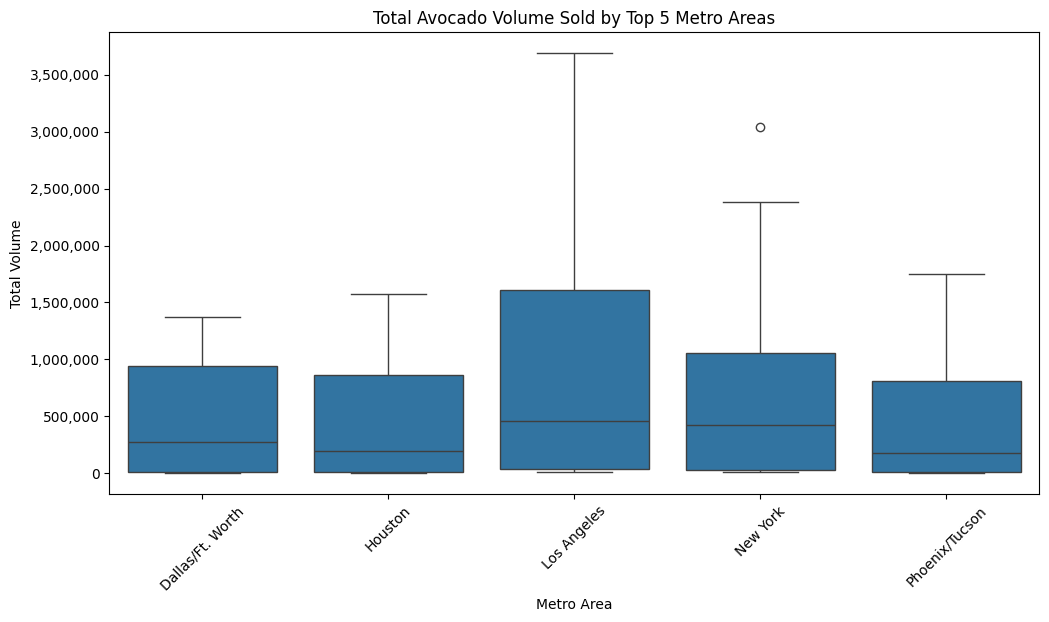

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Calculate total volume
avocado_data['total_volume'] = avocado_data['small_avocados'] + avocado_data['medium_avocados'] + avocado_data['large_avocados']

# Define metro regions based on previous categorization
metro_regions = [
    'Los Angeles',
    'New York',
    'Chicago',
    'Dallas/Ft. Worth',
    'Miami/Ft. Lauderdale',
    'Atlanta',
    'Baltimore/Washington',
    'Boston',
    'Charlotte',
    'Cincinnati/Dayton',
    'Columbus',
    'Denver',
    'Detroit',
    'Houston',
    'Indianapolis',
    'Jacksonville',
    'Las Vegas',
    'Louisville',
    'Milwaukee',
    'Nashville',
    'New Orleans/Mobile',
    'Orlando',
    'Philadelphia',
    'Phoenix/Tucson',
    'Pittsburgh',
    'Portland',
    'Richmond/Norfolk',
    'Sacramento',
    'San Diego',
    'San Francisco',
    'Seattle',
    'St. Louis',
    'Tampa',
]

# Filter for metro regions only
metro_data = avocado_data[avocado_data['geography'].isin(metro_regions)]

# Calculate average sales for each metro area
metro_avg_sales = metro_data.groupby('geography')['total_volume'].mean().reset_index()

# Sort by average sales and get the top 5 metro regions
top_metro_areas = metro_avg_sales.sort_values(by='total_volume', ascending=False).head(5)

# Filter the original metro_data to include only the top 5 metro areas
top_metro_data = metro_data[metro_data['geography'].isin(top_metro_areas['geography'])]

# Create side-by-side box plots
plt.figure(figsize=(12, 6))
sns.boxplot(x='geography', y='total_volume', data=top_metro_data)

# Format y-axis to regular notation
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.title('Total Avocado Volume Sold by Top 5 Metro Areas')
plt.xlabel('Metro Area')
plt.ylabel('Total Volume')
plt.xticks(rotation=45)
plt.show()

6. From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only.

In [7]:
# Define the California regions
california_regions = ['Los Angeles', 'San Diego', 'Sacramento', 'San Francisco']

# Create a new dataset with only the California regions
california_data = avocado_data[avocado_data['geography'].isin(california_regions)]

# Display the first few rows of the new dataset
print(california_data.head())

         date  average_price  total_volume  small_avocados  medium_avocados  \
44 2015-01-04           0.85    2426655.90      1837999.65        524430.47   
45 2015-01-04           1.25      49444.91        47721.51          1723.40   
80 2015-01-04           1.05     390538.80       110693.69        270107.61   
81 2015-01-04           1.33       8055.04         3727.52          4327.52   
82 2015-01-04           0.94     424754.34       244152.26        165299.33   

    large_avocados  total_bags  small_bags  large_bags  xlarge_bags  \
44        64225.78   255504.05   215571.80    36981.72      2950.53   
45            0.00     5050.63     5050.63        0.00         0.00   
80         9737.50    39600.08    39600.08        0.00         0.00   
81            0.00     1158.45     1158.45        0.00         0.00   
82        15302.75    36852.99    30884.29     5595.00       373.70   

            type  year    geography region_category  month  day  
44  conventional  2015  Los Ange

7. In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization

The California region with the greatest difference in price between organic and conventional avocados is 'San Francisco' with a difference of $0.72.


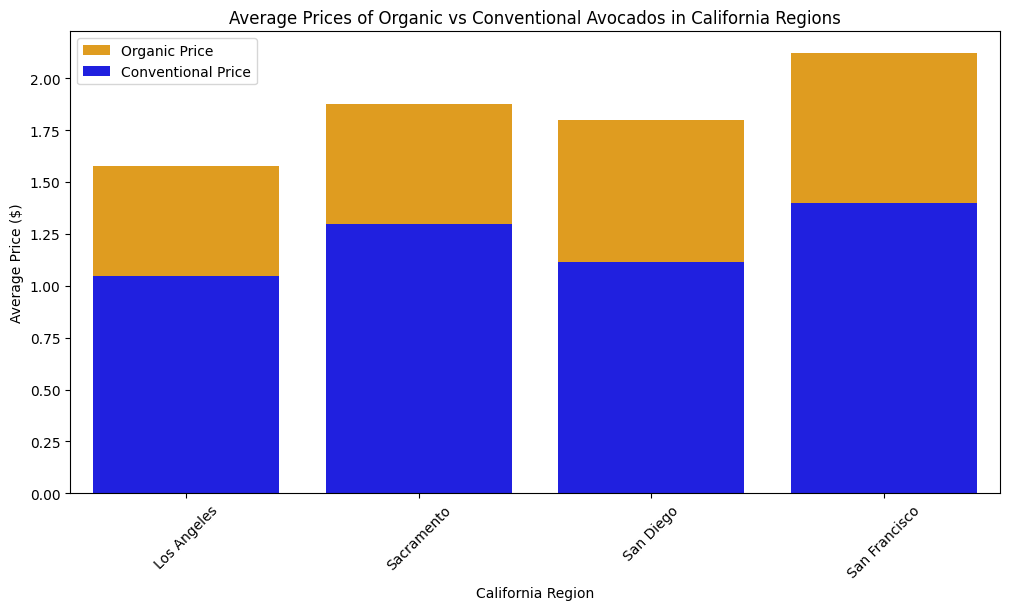

In [8]:


# Separate organic and conventional data
organic_data = california_data[california_data['type'] == 'organic']
conventional_data = california_data[california_data['type'] == 'conventional']

# Calculate the mean price for each region
organic_mean_prices = organic_data.groupby('geography')['average_price'].mean().reset_index()
conventional_mean_prices = conventional_data.groupby('geography')['average_price'].mean().reset_index()

# Merge the two DataFrames on geography
price_comparison = pd.merge(organic_mean_prices, conventional_mean_prices, on='geography', suffixes=('_organic', '_conventional'))

# Calculate the price difference
price_comparison['price_difference'] = price_comparison['average_price_organic'] - price_comparison['average_price_conventional']

# Find the region with the maximum price difference
max_diff_region = price_comparison.loc[price_comparison['price_difference'].idxmax()]

print(f"The California region with the greatest difference in price between organic and conventional avocados is '{max_diff_region['geography']}' with a difference of ${max_diff_region['price_difference']:.2f}.")

# Visualize the results
plt.figure(figsize=(12, 6))
sns.barplot(x='geography', y='average_price_organic', data=price_comparison, color='orange', label='Organic Price') # Changed DataFrame to price_comparison
sns.barplot(x='geography', y='average_price_conventional', data=price_comparison, color='blue', label='Conventional Price') # Changed DataFrame to price_comparison

plt.title('Average Prices of Organic vs Conventional Avocados in California Regions')
plt.ylabel('Average Price ($)')
plt.xlabel('California Region')
plt.xticks(rotation=45)
plt.legend()
plt.show()







8. The following plot shows, for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic. Recreate the plot; you do not have to replicate the exact finishing touches - e.g., color, theme - but your plot should resemble the content of this plot.


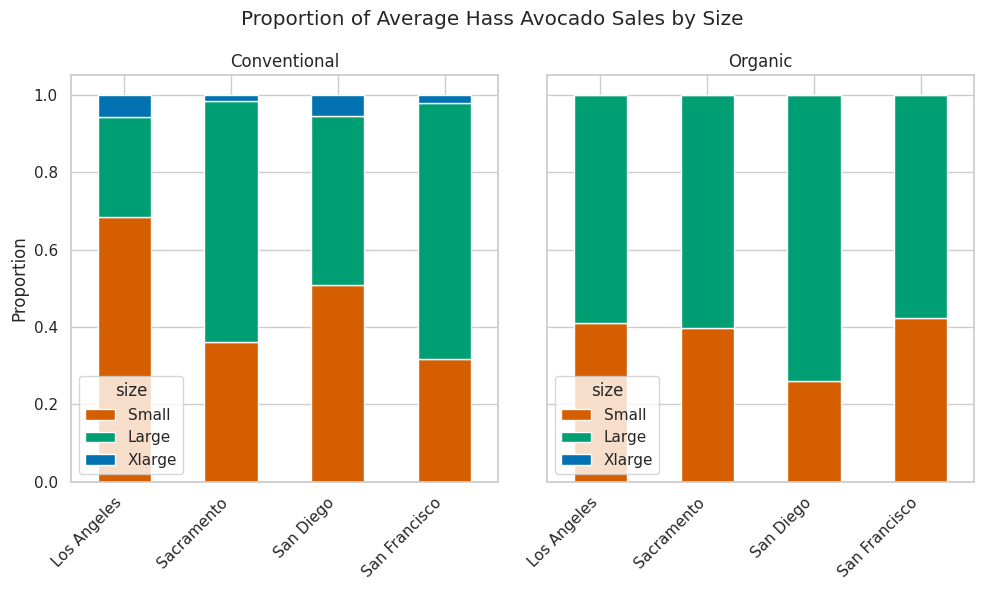

In [11]:
# Filter the data for the four California regions
california_regions = ['Los Angeles', 'San Diego', 'Sacramento', 'San Francisco']
filtered_data = avocado_data[avocado_data['geography'].isin(california_regions)]

# Select only the relevant columns (for small, medium, and large avocado sales)
size_columns = ['small_avocados', 'medium_avocados', 'large_avocados']

# Melt the data to get a 'size' column
melted_data = filtered_data.melt(id_vars=['geography', 'type', 'total_volume'],
                                 value_vars=size_columns,
                                 var_name='size',
                                 value_name='volume_sold')

# Rename the size categories to match 'small', 'large', 'extra-large'
size_mapping = {
    'small_avocados': 'Small',
    'medium_avocados': 'Large',
    'large_avocados': 'Xlarge'
}
melted_data['size'] = melted_data['size'].map(size_mapping)

# Group by region, type, and size, then sum the volumes
grouped_data = melted_data.groupby(['geography', 'type', 'size'])['volume_sold'].sum().reset_index()

# Create a pivot table to normalize the proportions
pivot_data = grouped_data.pivot_table(index=['geography', 'type'], columns='size', values='volume_sold', aggfunc='sum')

# Normalize by the total sales per type in each region to get proportions
pivot_data = pivot_data.div(pivot_data.sum(axis=1), axis=0)

# Reset the index to make it easier for plotting
pivot_data = pivot_data.reset_index()

# Set up the plot for stacked bars
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
sns.set(style='whitegrid')

# Plot for conventional
pivot_data_conventional = pivot_data[pivot_data['type'] == 'conventional']
pivot_data_conventional.set_index('geography')[['Small', 'Large', 'Xlarge']].plot(
    kind='bar', stacked=True, ax=axes[0], color=['#d55e00', '#009e73', '#0072b2'])
axes[0].set_title('Conventional')
axes[0].set_ylabel('Proportion')
axes[0].set_xlabel('')

# Plot for organic
pivot_data_organic = pivot_data[pivot_data['type'] == 'organic']
pivot_data_organic.set_index('geography')[['Small', 'Large', 'Xlarge']].plot(
    kind='bar', stacked=True, ax=axes[1], color=['#d55e00', '#009e73', '#0072b2'])
axes[1].set_title('Organic')
axes[1].set_ylabel('')
axes[1].set_xlabel('')

# Overall plot settings
fig.suptitle('Proportion of Average Hass Avocado Sales by Size')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


ChatGPT 3.5 & Google Gemini were used for a majority of the code in this lab.